# Day-58: Activation Functions

In the last session, we talked about Introduction to Neural Networks — we covered how biological neurons inspire artificial neurons, what perceptrons are, and how they come together in feedforward neural networks.

Today, we’re diving into one of the most important topics that gives life to neural networks — Activation Functions!
Without activation functions, your network is just a linear equation machine — no matter how many layers you add, it’ll still act like a single linear model.
So let’s break down why we need them, how they work, and when to use which one.

## Topics Covered:
- The Need for Non-Linearity
- Activation Functions
- Types of Activation Functions
    - ReLU
    - Sigmoid
    - Tanh
    - Softmax
- Why and when to Use Each Activation Functions

## The Need for Non-Linearity

Picture this: If $ y=(x_1.w_1)+(x_2.w_2) $ is your neuron's output, stacking another layer just gives you another linear equation. The network remains linear!

Thus,the Activation Function, $A(z)$, transforms the linear output z into a non-linear one, allowing the network to map complex inputs to complex outputs

- `Analogy`:
    - Imagine you’re trying to teach a robot to recognize a circle using only rulers — no curves allowed! That’s what a linear network does.
    - To make it “see” curves and complex shapes, we introduce non-linearity through activation functions. They allow each neuron to bend, squash, or amplify the signal — letting the network learn non-linear decision boundaries.

In short:

Without non-linearity → your model is a fancy linear regression.

With non-linearity → your model becomes a universal function approximator!

## Types of Activation Functions

### ReLU (Rectified Linear Unit)

$$ ReLU(z) = max(0,x) $$

- `Analogy`: A simple light switch:

    - If the input (z) is negative, the light is off (output is 0).

    - If the input (z) is positive, the light is on (output is z).

| Input (x) | Calculation       | Output (ReLU(x)) |
| :-------- | :---------------- | :--------------: |
| -5        | max(0, -5) → 0    |         0        |
| -2        | max(0, -2) → 0    |         0        |
| -0.5      | max(0, -0.5) → 0  |         0        |
| 0         | max(0, 0) → 0     |         0        |
| 0.5       | max(0, 0.5) → 0.5 |        0.5       |
| 1         | max(0, 1) → 1     |         1        |
| 3         | max(0, 3) → 3     |         3        |
| 5         | max(0, 5) → 5     |         5        |


#### Advantage:
- **Solves Vanishing Gradient**: For positive values, the derivative is always 1 (a constant slope), which keeps the gradients healthy and allows deep networks to train fast.
- **Computational Efficiency**: It involves only a simple max operation—super fast to compute!

#### Limitation

**The Small Catch (Dying ReLU)**: If a neuron's input consistently stays negative, the ReLU output will always be zero, and its gradient will also be zero. The neuron effectively "dies" and stops learning. Variants like Leaky ReLU help fix this.

### Sigmoid Function

$$ \sigma(z) =\frac{1}{1+e^{-z}} $$

- `Analogy`: Like a dimmer switch — smoothly controls the brightness.

| Input (x) | Calculation                    | Output (Sigmoid(x)) |
| :-------- | :----------------------------- | :-----------------: |
| -5        | $\frac{1}{1 + e^{(-(-5))}}$ → 0.006693   |       0.006693      |
| -2        | 1/(1 + e^(-(-2))) → 0.119203   |       0.119203      |
| -0.5      | 1/(1 + e^(-(-0.5))) → 0.377541 |       0.377541      |
| 0         | 1/(1 + e^(-(0))) → 0.500000    |       0.500000      |
| 0.5       | 1/(1 + e^(-(0.5))) → 0.622459  |       0.622459      |
| 1         | 1/(1 + e^(-(1))) → 0.731059    |       0.731059      |
| 3         | 1/(1 + e^(-(3))) → 0.952574    |       0.952574      |
| 5         | 1/(1 + e^(-(5))) → 0.993307    |       0.993307      |


#### Limitation: 
Gradients become tiny for extreme values → slow learning (vanishing gradients).


### Tanh Function

$$ tanh(x)= \frac{e^x + e^{−x}}{e^x−e^{−x}} $$

| Input (x) | Calculation                                             | Output (tanh(x)) |
| :-------- | :------------------------------------------------------ | :--------------: |
| -5        | (e^(-5) - e^(5)) / (e^(-5) + e^(5)) → -0.999909         |     -0.999909    |
| -2        | (e^(-2) - e^(2)) / (e^(-2) + e^(2)) → -0.964028         |     -0.964028    |
| -0.5      | (e^(-0.5) - e^(0.5)) / (e^(-0.5) + e^(0.5)) → -0.462117 |     -0.462117    |
| 0         | (e^(0) - e^(0)) / (e^(0) + e^(0)) → 0.000000            |     0.000000     |
| 0.5       | (e^(0.5) - e^(-0.5)) / (e^(0.5) + e^(-0.5)) → 0.462117  |     0.462117     |
| 1         | (e^(1) - e^(-1)) / (e^(1) + e^(-1)) → 0.761594          |     0.761594     |
| 3         | (e^(3) - e^(-3)) / (e^(3) + e^(-3)) → 0.995055          |     0.995055     |
| 5         | (e^(5) - e^(-5)) / (e^(5) + e^(-5)) → 0.999909          |     0.999909     |


- `Analogy`: A thermostat that can swing both positive and negative.

#### Limitation:

Still saturates for large |x| values → vanishing gradient persists.

### Softmax

$$ \text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}} $$

- `Analogy`: Converts exam marks into normalized probabilities that sum to 100%.

| Input (xᵢ) | Calculation                             | Output (Softmax(xᵢ)) |
| :--------- | :-------------------------------------- | :------------------: |
| -2         | e^(-2)/Σ(e^x) = 0.1353 / 21.19 → 0.0064 |        0.0064        |
| 0          | e^(0)/Σ(e^x) = 1.0000 / 21.19 → 0.0472  |        0.0472        |
| 1          | e^(1)/Σ(e^x) = 2.7183 / 21.19 → 0.1282  |        0.1282        |
| 3          | e^(3)/Σ(e^x) = 20.0855 / 21.19 → 0.8182 |        0.8182        |


Σ(Softmax outputs) ≈ 1.000

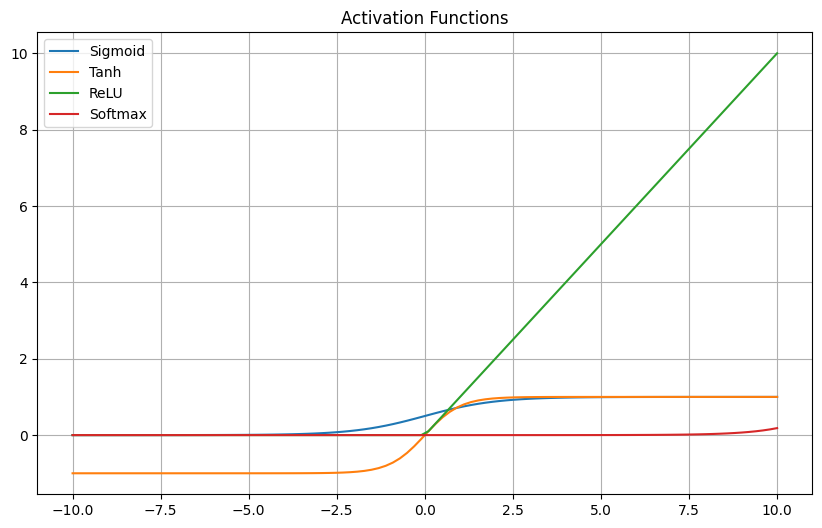

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)
softmax = np.exp(x) / np.sum(np.exp(x))

plt.figure(figsize=(10,6))
plt.plot(x, sigmoid, label='Sigmoid')
plt.plot(x, tanh, label='Tanh')
plt.plot(x, relu, label='ReLU')
plt.plot(x, softmax, label='Softmax')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)
plt.show()


| Activation Function             | Why We Use It                                                                               | When to Use It                                                                                    | Key Pros                                                             | Common Cons                                                             |   |                         |
| :------------------------------ | :------------------------------------------------------------------------------------------ | :------------------------------------------------------------------------------------------------ | :------------------------------------------------------------------- | :---------------------------------------------------------------------- | - | ----------------------- |
| **Sigmoid**                     | Smoothly maps values between 0 and 1, mimicking probability; useful for binary output.      | ✅ Output layer of **binary classification** models.<br>✅ Logistic regression, simple neural nets. | • Interpretable probabilistic output<br>• Differentiable everywhere  | • **Vanishing gradients** for large                                     | x | <br>• Not zero-centered |
| **Tanh**                        | Scales inputs between −1 and 1 and centers data; better convergence than sigmoid.           | ✅ Hidden layers in **small networks** where negative activations help learning.                   | • Zero-centered output<br>• Strong gradient near 0                   | • Still suffers from vanishing gradients<br>• Slower training than ReLU |   |                         |
| **ReLU**                        | Adds non-linearity and sparsity; keeps positive values, zeroes negatives — fast and simple. | ✅ **Default choice for hidden layers** in most deep networks (CNNs, MLPs).                        | • Efficient, fast convergence<br>• Reduces vanishing gradient issues | • “**Dead ReLU**” for negative inputs<br>• Not zero-centered            |   |                         |
| **Leaky ReLU / ELU (Variants)** | Allow small slope for negative x to fix dead neurons.                                       | ✅ When ReLU neurons die or data has many negatives.                                               | • Keeps gradient alive for x < 0                                     | • Slightly slower computation                                           |   |                         |
| **Softmax**                     | Converts raw scores (logits) into **probabilities that sum to 1**.                          | ✅ **Output layer for multi-class classification** problems.                                       | • Probabilistic interpretation<br>• Highlights strongest class       | • Not used in hidden layers<br>• Sensitive to large logits              |   |                         |


In [2]:
import numpy as np
from tabulate import tabulate

# --- Core Activation Function Definitions ---

def sigmoid(z):
    """Sigmoid: Used for binary classification (0 to 1)."""
    return 1 / (1 + np.exp(-z))

def tanh(z):
    """Tanh: Used in hidden layers historically (-1 to 1)."""
    return np.tanh(z)

def relu(z):
    """ReLU: Standard for hidden layers (0 or z)."""
    return np.maximum(0, z)

def softmax(z):
    """Softmax: Used for multi-class classification (probabilities sum to 1)."""
    # Exponentiate the inputs
    exp_z = np.exp(z - np.max(z, axis=-1, keepdims=True)) 
    # Subtracting max(z) is done for numerical stability against large inputs
    
    # Calculate probability distribution
    return exp_z / np.sum(exp_z, axis=-1, keepdims=True)


# --- Demonstration ---
# Sample linear inputs (z) from a neuron
Z_single = np.array([-3.0, -1.0, 0.0, 1.0, 3.0])

# Sample outputs from the final layer of a 3-class model
Z_multi_class = np.array([1.5, 0.5, 0.1]) # Represents scores for [Negative, Neutral, Positive]

print("--- 1. Activation Function Output Demonstration ---")

results = [
    ["Input (z)"] + Z_single.tolist(),
    ["Sigmoid(z)"] + np.round(sigmoid(Z_single), 3).tolist(),
    ["Tanh(z)"] + np.round(tanh(Z_single), 3).tolist(),
    ["ReLU(z)"] + np.round(relu(Z_single), 3).tolist(),
]

print("\n--- Outputs for Hidden/Binary Layers ---")
print(tabulate(results, headers="firstrow", tablefmt="github"))


print("\n--- 2. Softmax for Multi-Class Output ---")
softmax_output = softmax(Z_multi_class)

print(f"Raw Scores (Logits): {np.round(Z_multi_class, 2)}")
print(f"Softmax Probabilities: {np.round(softmax_output, 3)}")
print(f"Sum of Probabilities: {np.sum(softmax_output):.3f}")

# Interpreting Softmax:
# If this was our YouTube Sentiment classifier, the model predicts:
# Class 1 (Negative): {softmax_output[0]*100:.1f}% probability
# Class 2 (Neutral): {softmax_output[1]*100:.1f}% probability
# Class 3 (Positive): {softmax_output[2]*100:.1f}% probability


--- 1. Activation Function Output Demonstration ---

--- Outputs for Hidden/Binary Layers ---
| Input (z)   |   -3.0 |   -1.0 |   0.0 |   1.0 |   3.0 |
|-------------|--------|--------|-------|-------|-------|
| Sigmoid(z)  |  0.047 |  0.269 |   0.5 | 0.731 | 0.953 |
| Tanh(z)     | -0.995 | -0.762 |   0   | 0.762 | 0.995 |
| ReLU(z)     |  0     |  0     |   0   | 1     | 3     |

--- 2. Softmax for Multi-Class Output ---
Raw Scores (Logits): [1.5 0.5 0.1]
Softmax Probabilities: [0.619 0.228 0.153]
Sum of Probabilities: 1.000
